In [446]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

In [447]:
def read_csv(path: str):
    """
    Funcao responsavel por realizar a leitura de um dataset em formato csv

    Parameters:
    path: Arquivo csv contendo os dados

    Returns: 
    df: DataFrame contendo os dados já lidos 
    """
    df = pd.read_csv(path, low_memory=True, dtype=str)
    if "votos_cantidad" in df.columns:
        df["votos_cantidad"] = df["votos_cantidad"].astype("int32")

    return df

In [448]:
# Dicionário de normalizações 
normalizacoes_2023={"UNION POR LA PATRIA": "UNION POR LA PATRIA",
    "FRENTE CIVICO POR SANTIAGO": "UNION POR LA PATRIA",
    "MAS PARA ENTRE RIOS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR DE LA CONCORDIA – INNOVACION FEDERAL": "UNION POR LA PATRIA",
    "UNION POR SAN LUIS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR": "UNION POR LA PATRIA",

    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "AHORA PATRIA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "PARTIDO RENOVADOR FEDERAL": "LA LIBERTAD AVANZA",
    "ARRIBA NEUQUEN": "LA LIBERTAD AVANZA",
    "PARTIDO FE": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "HACEMOS POR NUESTRO PAIS": "HACEMOS POR NUESTRO PAIS",
    "LA FUERZA DE SANTA FE": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO AUTONOMISTA": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO DEMOCRATA CRISTIANO": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO UNION Y LIBERTAD": "HACEMOS POR NUESTRO PAIS",}

normalizacoes_2021={"JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "JUNTOS": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "CHACO CAMBIA + JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO +": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR FORMOSA LIBRE": "JUNTOS POR EL CAMBIO",
    "UNIDOS POR SAN LUIS": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA NEUQUEN": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "COALICION CIVICA - (ARI)": "JUNTOS POR EL CAMBIO",
    "VAMOS LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",
    "UNION CIVICA RADICAL": "JUNTOS POR EL CAMBIO",
    "UNIDOS": "JUNTOS POR EL CAMBIO",

    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "FUERZA SAN LUIS": "FRENTE DE TODOS",
    "FRENTE RENOVADOR": "FRENTE DE TODOS",
    "COMPROMISO FEDERAL": "FRENTE DE TODOS",
    "TODOS UNIDOS": "FRENTE DE TODOS",

    "HACEMOS POR CORDOBA": "TERCERA VIA",
    "VAMOS CON VOS": "TERCERA VIA",
    "FRENTE AMPLIO PROGRESISTA": "TERCERA VIA",
    "MOVIMIENTO LIBRES DEL SUR": "TERCERA VIA",
    "PARTIDO SOCIALISTA": "TERCERA VIA",
    "FRENTE AMPLIO POR TUCUMAN": "TERCERA VIA",
    "CONSENSO ISCHIGUALASTO": "TERCERA VIA ",
    "PARTIDO FE": "TERCERA VIA",
    "FRENTE AMPLIO CATAMARQUENO": "TERCERA VIA",

    "AVANZA LIBERTAD": "LA LIBERTAD AVANZA",
    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "VAMOS MENDOCINOS": "LA LIBERTAD AVANZA",
    "PODEMOS": "LA LIBERTAD AVANZA",
    "PARTIDO CONSERVADOR POPULAR": "LA LIBERTAD AVANZA",
    "PARTIDO LIBERTAD, VALORES Y CAMBIO": "LA LIBERTAD AVANZA",
    "UNION DEL CENTRO DEMOCRATICO": "LA LIBERTAD AVANZA",
    "UNION POPULAR FEDERAL": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO DEL OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",}

normalizacoes_2019={ "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "VAMOS TODOS A VIVIR MEJOR": "FRENTE DE TODOS",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "ENCUENTRO POR CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE AMPLIO FORMOSEÑO": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "CONSENSO FEDERAL": "CONSENSO FEDERAL",
    "ALIANZA HACEMOS POR CORDOBA": "CONSENSO FEDERAL",
    "PARTIDO SOCIALISTA": "CONSENSO FEDERAL",
    "UNION POR SALTA": "CONSENSO FEDERAL",
    "PROTECTORA FUERZA POLITICA": "CONSENSO FEDERAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "CONSENSO FEDERAL",
    "MOVIMIENTO POLO SOCIAL": "CONSENSO FEDERAL",
    "MOVIMIENTO LIBRES DEL SUR": "CONSENSO FEDERAL",
    "FRENTE RENOVADOR AUTENTICO": "CONSENSO FEDERAL",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE NOS",
    "FUERZA REPUBLICANA": "FRENTE NOS",
    "ENCUENTRO VECINAL CORDOBA": "FRENTE NOS",
    "PARTIDO CONSERVADOR POPULAR": "FRENTE NOS",
    "ACCION CHAQUENA": "FRENTE NOS",
    "PARTIDO CIUDADANOS A GOBERNAR": "FRENTE NOS",}

normalizacoes_2017={"CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS": "CAMBIEMOS",
    "VAMOS JUNTOS": "CAMBIEMOS",
    "CAMBIEMOS PARA EL BICENTENARIO": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS - PARTIDO IDENTIDAD SALTENA": "CAMBIEMOS",
    "FRENTE JUJENO CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS SAN JUAN": "CAMBIEMOS",
    "AVANZAR Y CAMBIEMOS POR SAN LUIS": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO - CAMBIEMOS": "CAMBIEMOS",
    "FRENTE CAMBIEMOS LA PAMPA": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS - FUERZA CIVICA RIOJANA": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL - CAMBIEMOS": "CAMBIEMOS",
    "UNION PARA VIVIR MEJOR - CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDAD CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "UNIDAD PORTENA": "UNIDAD CIUDADANA",
    "FRENTE CIVICO POR SANTIAGO": "UNIDAD CIUDADANA",
    "CORDOBA CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE UNIDAD JUSTICIALISTA SAN LUIS": "UNIDAD CIUDADANA",
    "PARTIDO AGRARIO Y SOCIAL": "UNIDAD CIUDADANA",
    "UNIDAD CIUDADANA PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE NEUQUINO": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO Y SOCIAL": "UNIDAD CIUDADANA",
    "FRENTE POPULAR PARA LA LIBERACION": "UNIDAD CIUDADANA",
    "ALTERNATIVA POPULAR RIOJANA": "UNIDAD CIUDADANA",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",}

normalizacoes_2015={ "CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS MENDOZA": "CAMBIEMOS",
    "CAMBIA JUJUY": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS SALTA": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL": "CAMBIEMOS",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDOS POR UNA NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POR CORDOBA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR FEDERAL DE LA ESPERANZA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "COMPROMISO POR SAN JUAN": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POPULAR": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE UNIDOS": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "PUEBLO NUEVO": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE TERCERA POSICION": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR AUTENTICO": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "PROGRESISTAS": "PROGRESISTAS",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "PROGRESISTAS",
    "PARTIDO SOCIALISTA": "PROGRESISTAS",
    "MOVIMIENTO POLO SOCIAL – LA TERCERA POSICION DE LA GENTE": "PROGRESISTAS",
    "PARTIDO GEN": "PROGRESISTAS",

    "ALIANZA FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA (UNA)": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",
    "ALIANZA CAMBIEMOS": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS MENDOZA": "CAMBIEMOS",
    "ALIANZA CAMBIA JUJUY": "CAMBIEMOS",
    "ALIANZA ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS SALTA": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "ALIANZA FRENTE AMPLIO FORMOSENO": "CAMBIEMOS",
    "ALIANZA FRENTE CIVICO Y SOCIAL": "CAMBIEMOS",
    "ALIANZA FRENTE PAMPEANO CIVICO Y SOCIAL": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "ALIANZA CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",
    "ALIANZA FRENTE CAMBIEMOS": "CAMBIEMOS",

    "ALIANZA UNIDOS POR UNA NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA UNION POR CORDOBA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE RENOVADOR FEDERAL DE LA ESPERANZA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA COMPROMISO POR SAN JUAN": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA MOVIMIENTO DE PARTICIPACION CIUDADANA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA UNION POPULAR": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE UNIDOS": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA PUEBLO NUEVO": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE TERCERA POSICION": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "ALIANZA FRENTE RENOVADOR AUTENTICO": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA PROGRESISTAS": "PROGRESISTAS",
    "ALIANZA FRENTE PROGRESISTA CIVICO Y SOCIAL": "PROGRESISTAS",
    "ALIANZA PARTIDO SOCIALISTA": "PROGRESISTAS",
    "ALIANZA MOVIMIENTO POLO SOCIAL – LA TERCERA POSICION DE LA GENTE": "PROGRESISTAS",
    "ALIANZA PARTIDO GEN": "PROGRESISTAS",

    "ALIANZA COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "ALIANZA PARTIDO ES POSIBLE": "COMPROMISO FEDERAL"
    }

normalizacoes_2013={"FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA DE LA PROVINCIA DE SALTA": "FRENTE PARA LA VICTORIA",
    "PARTIDO DE LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "MOVIMIENTO SOLIDARIO POPULAR": "FRENTE PARA LA VICTORIA",
    "ENCUENTRO DEMOCRATICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",

    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION CIVICA RADICAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO UNEN": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ACUERDO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ENCUENTRO POR CORRIENTES": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION POR CHACO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE JUJENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO FORMOSENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FUERZA CIVICA RIOJANA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION PARA VIVIR MEJOR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COMPROMISO CIVICO NEUQUINO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "PARTIDO SOCIALISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL – COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA SUR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",

    "FRENTE RENOVADOR": "FRENTE RENOVADOR",
    "CAMBIO POPULAR": "FRENTE RENOVADOR",
    "FRENTE TERCERA POSICION – UNIDAD CATAMARQUENA": "FRENTE RENOVADOR",
    "SANTAFESINO CIEN POR CIENTO": "FRENTE RENOVADOR",
    "PARTIDO LABORISTA DE LA INDEPENDENCIA": "FRENTE RENOVADOR",

    "UNION PRO": "PROPUESTA REPUBLICANA",
    "UNION PRO SANTA FE FEDERAL": "PROPUESTA REPUBLICANA",
    "UNION POR ENTRE RIOS": "PROPUESTA REPUBLICANA",
    "FRENTE POPULAR SALTENIO": "PROPUESTA REPUBLICANA",
    "FRENTE UNIDOS": "PROPUESTA REPUBLICANA",
    "PARTIDO DEMOCRATA – PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PROPUESTA FEDERAL": "PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "NUEVO PACTO FEDERAL": "PROPUESTA REPUBLICANA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE  TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "UNIDOS POR LA LIBERTAD Y EL TRABAJO": "PARTIDO FE",
    "FRENTE RENOVADOR DE LA CONCORDIA": "PARTIDO FE",
    "COMPROMISO FEDERAL": "PARTIDO FE",
    "PARTIDO ACCION CHUBUTENSE": "PARTIDO FE",
    "UNION CON FE": "PARTIDO FE",
    "PARTIDO FE": "PARTIDO FE",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "MOVIMIENTO POPULAR NEUQUINO": "NUEVA IZQUIERDA",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "NUEVA IZQUIERDA",
    "ALTERNATIVA POPULAR": "NUEVA IZQUIERDA",
    "FRENTE DEL PUEBLO": "NUEVA IZQUIERDA",}

normalizacoes_2011={ "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE PARA LA VICTORIA",
    "PARTIDO HUMANISTA": "FRENTE PARA LA VICTORIA",
    "FRENTE PARA LA VICTORIA RIOJANA": "FRENTE PARA LA VICTORIA",
    "FRENTE POPULAR RIOJANO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",

    "FRENTE AMPLIO PROGRESISTA": "FRENTE AMPLIO PROGRESISTA",
    "PARTIDO SOCIALISTA": "FRENTE AMPLIO PROGRESISTA",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE AMPLIO PROGRESISTA",
    "MOVIMIENTO LIBRES DEL SUR": "FRENTE AMPLIO PROGRESISTA",

    "UNION PARA EL DESARROLLO SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "UNION CIVICA RADICAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO FEDERAL – UNION PARA EL DESARROLLO SOCIAL MENDOZA": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",

    "FRENTE POPULAR": "PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PRO - PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PRO-PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "UNION POPULAR": "PROPUESTA REPUBLICANA",
    "FRENTE SALTENIO": "PROPUESTA REPUBLICANA",
    "PARTIDO INDEPENDIENTE DEL CHUBUT": "PROPUESTA REPUBLICANA",
    "FRENTE POPULAR UNION PRO": "PROPUESTA REPUBLICANA",
    "FRENTE PRIMERO JUJUY": "PROPUESTA REPUBLICANA",
    "CAMBIO POPULAR TUCUMANO": "PROPUESTA REPUBLICANA",
    "MOVIMIENTO INDEPENDIENTE RENOVADOR": "PROPUESTA REPUBLICANA",
    "PARTIDO FORTALEZA": "PROPUESTA REPUBLICANA",
    "ACUERDO REPUBLICANO FEDERAL": "PROPUESTA REPUBLICANA",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "UNION PROVINCIAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",

    "COALICION CIVICA - AFIRMACION PARA UNA REPUBLICA IGUALITARIA ARI": "COALICION CIVICA - (ARI)",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "COALICION CIVICA - (ARI)",
    "UNION POR LA LIBERTAD": "COALICION CIVICA - (ARI)",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "IZQUIERDA DEL TRABAJADOR POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO INDEPENDIENTE DE JUBILADOS Y DESOCUPADOS": "MOVIMIENTO PROYECTO SUR",
    "PARTIDO POPULAR DE LA RECONSTRUCCION": "MOVIMIENTO PROYECTO SUR",
    "PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "MOVIMIENTO PROYECTO SUR",
    "FRENTE ENCUENTRO SUR": "MOVIMIENTO PROYECTO SUR",

    "ALIANZA FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE PARA LA VICTORIA",
    "ALIANZA PARTIDO HUMANISTA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE PARA LA VICTORIA RIOJANA": "FRENTE PARA LA VICTORIA",
    "ALIANZA FRENTE POPULAR RIOJANO": "FRENTE PARA LA VICTORIA",
    "ALIANZA PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",

    "ALIANZA FRENTE AMPLIO PROGRESISTA": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA PARTIDO SOCIALISTA": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE AMPLIO PROGRESISTA",
    "ALIANZA MOVIMIENTO LIBRES DEL SUR": "FRENTE AMPLIO PROGRESISTA",

    "ALIANZA UNION PARA EL DESARROLLO SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA UNION CIVICA RADICAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE CIVICO FEDERAL – UNION PARA EL DESARROLLO SOCIAL MENDOZA": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE PAMPEANO CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "ALIANZA FRENTE CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",

    "ALIANZA FRENTE POPULAR": "PROPUESTA REPUBLICANA",
    "ALIANZA PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA PRO-PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA PRO - PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "ALIANZA UNION POPULAR": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE SALTENIO": "PROPUESTA REPUBLICANA",
    "ALIANZA PARTIDO INDEPENDIENTE DEL CHUBUT": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE POPULAR UNION PRO": "PROPUESTA REPUBLICANA",
    "ALIANZA FRENTE PRIMERO JUJUY": "PROPUESTA REPUBLICANA",
    "ALIANZA CAMBIO POPULAR TUCUMANO": "PROPUESTA REPUBLICANA",
    "ALIANZA MOVIMIENTO INDEPENDIENTE RENOVADOR": "PROPUESTA REPUBLICANA",
    "ALIANZA PARTIDO FORTALEZA": "PROPUESTA REPUBLICANA",
    "ALIANZA ACUERDO REPUBLICANO FEDERAL": "PROPUESTA REPUBLICANA",

    "ALIANZA COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "ALIANZA UNION PROVINCIAL": "COMPROMISO FEDERAL",
    "ALIANZA PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",

    "ALIANZA COALICION CIVICA - AFIRMACION PARA UNA REPUBLICA IGUALITARIA ARI": "COALICION CIVICA - (ARI)",
    "ALIANZA MOVIMIENTO DE PARTICIPACION CIUDADANA": "COALICION CIVICA - (ARI)",
    "ALIANZA UNION POR LA LIBERTAD": "COALICION CIVICA - (ARI)",

    "ALIANZA FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE  TRABAJADORES",
    "ALIANZA IZQUIERDA DEL TRABAJADOR POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "ALIANZA FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA MOVIMIENTO INDEPENDIENTE DE JUBILADOS Y DESOCUPADOS": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA PARTIDO POPULAR DE LA RECONSTRUCCION": "MOVimiento PROYECTO SUR",
    "ALIANZA PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "MOVIMIENTO PROYECTO SUR",
    "ALIANZA FRENTE ENCUENTRO SUR": "MOVIMIENTO PROYECTO SUR"
    }


In [449]:
def normalize_name(name: str, normalizacoes=None) -> str:
    """Normaliza o nome de partidos/coalizões com prioridade para correspondências exatas."""
    if pd.isna(name):
        return name
    
    # Limpeza do nome
    processed_name = unicodedata.normalize('NFD', name)
    processed_name = ''.join(c for c in processed_name if unicodedata.category(c) != 'Mn')
    processed_name = processed_name.upper().strip()

    if "FRENTE DE IZQUIERDA" in processed_name:
        result_name = "FRENTE DE IZQUIERDA Y DE TRABAJADORES"

    elif normalizacoes and processed_name in normalizacoes:
        result_name = normalizacoes[processed_name]
    else:
        result_name = processed_name
   
    # Limpeza final de espaços
    final_name = re.sub(r'\s+', ' ', result_name)
    return final_name.strip()     

In [450]:
def plot_votos(df: pd.DataFrame, cargo:str, ano:str):
    """
    Plota um gráfico de barras com os votos agrupados por partido para um determinado cargo.

    Parameters:
    df: DataFrame contendo os dados
    cargo: Cargo a ser utilizado como filtro (string)
    """

    # Filtrando para apenas Presidente
    df_cargo = df[df["cargo_nombre"] == cargo]

    # Agrupando votos para Presidente por Partido
    votos_por_partido = (
        df_cargo.groupby("agrupacion_nombre")["votos_cantidad"]
        .sum()
        .sort_values(ascending=False)
        .head(20))

    # Exibição do gráfico
    plt.figure(figsize=(10,6))
    votos_por_partido.plot(kind="bar", color="#233C49")
    plt.title(f"Votos para {cargo} por Partido - {ano}")
    plt.ylabel("Quantidade de votos")
    plt.xlabel("Partido", fontsize=8)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [451]:
#Leitura do CSV de 2023 contendo os resultados eleitorais provisorios
df_2023 = read_csv("data/ResultadoElectorales_2023_Generales.csv")
df_2023["agrupacion_nombre"] = df_2023["agrupacion_nombre"].apply(normalize_name, normalizacoes=normalizacoes_2023)

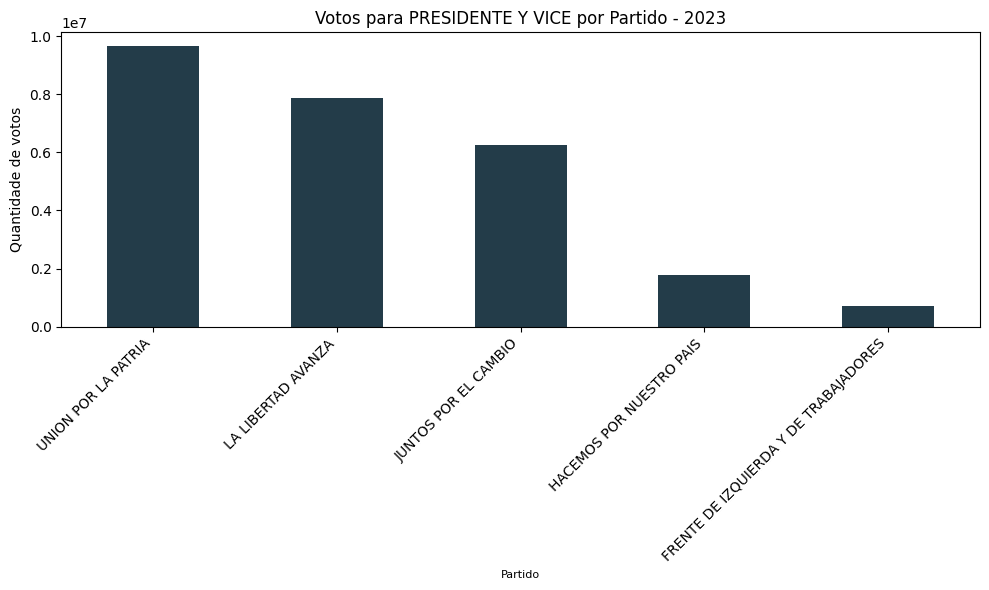

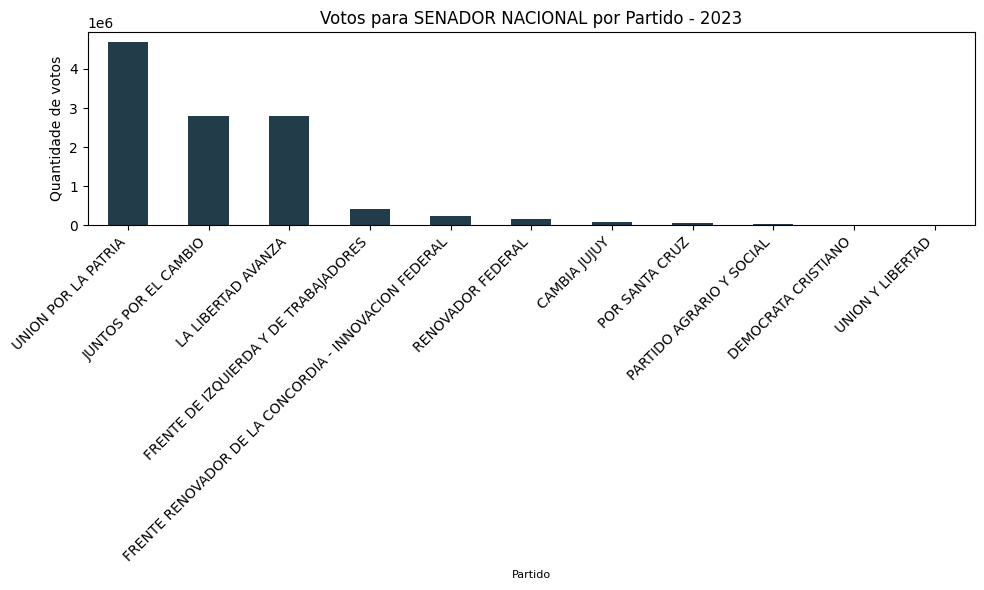

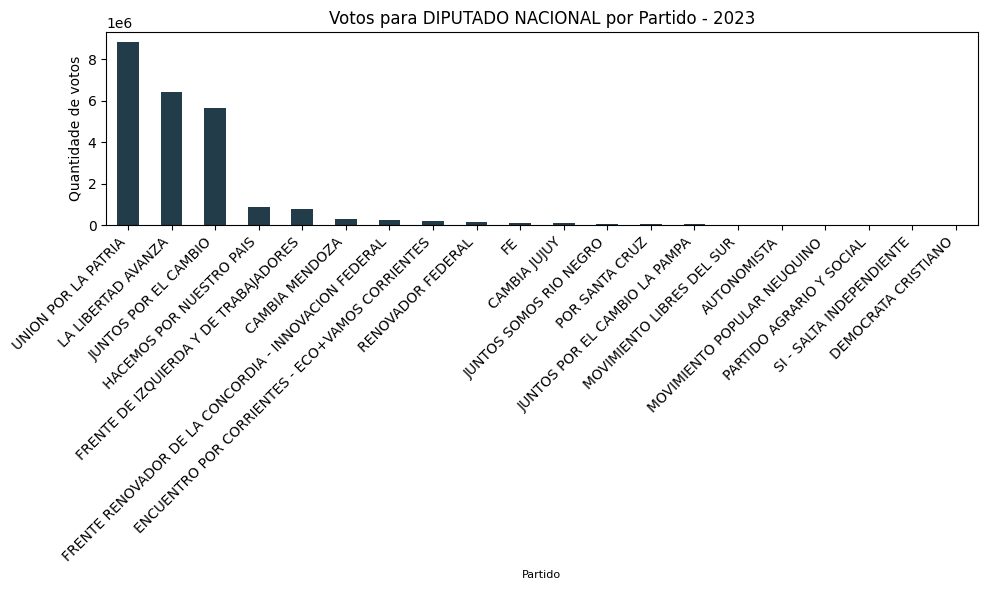

In [452]:
plot_votos(df_2023,"PRESIDENTE Y VICE", 2023)
plot_votos(df_2023,"SENADOR NACIONAL", 2023)
plot_votos(df_2023,"DIPUTADO NACIONAL", 2023)

In [453]:
#Leitura do CSV de 2021 contendo os resultados eleitorais provisorios
df_2021 = read_csv("data\ResultadosElectorales_2021_Generales.csv")
df_2021["agrupacion_nombre"] = df_2021["agrupacion_nombre"].apply(normalize_name,normalizacoes=normalizacoes_2021)

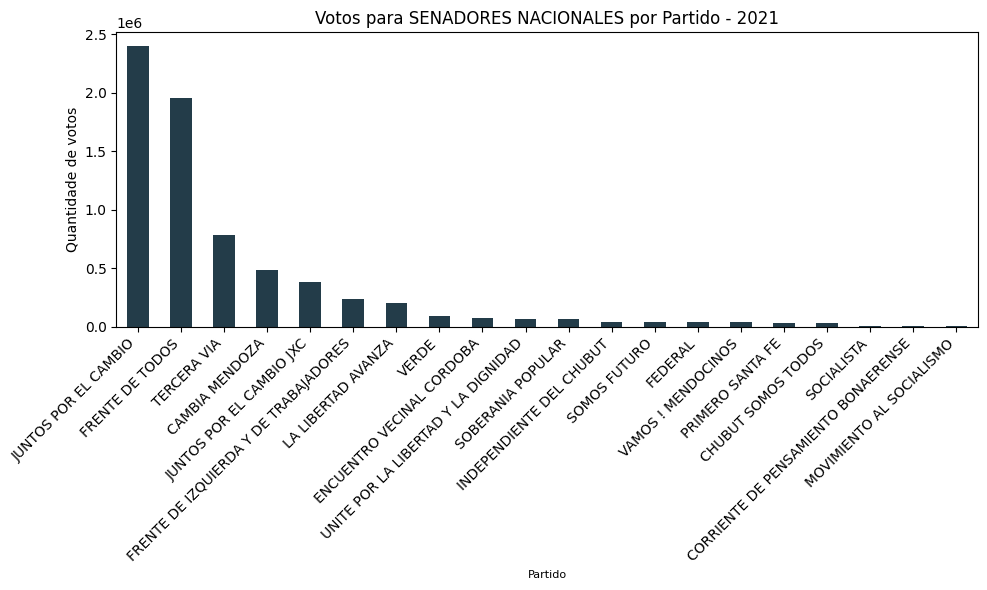

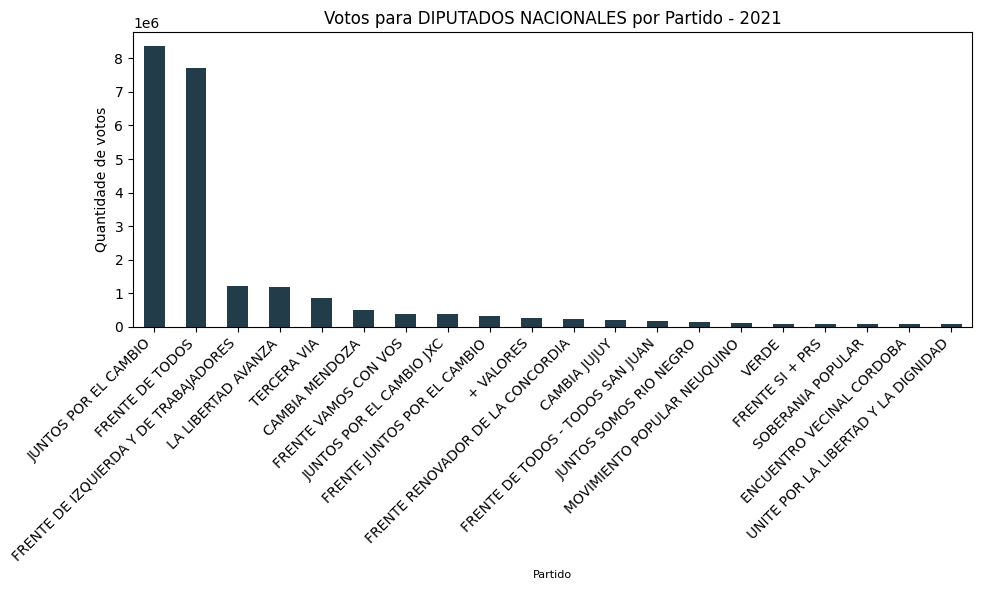

In [454]:
plot_votos(df_2021,"SENADORES NACIONALES", 2021)
plot_votos(df_2021,"DIPUTADOS NACIONALES", 2021)

In [455]:
#Leitura do CSV de 2019 contendo os resultados eleitorais provisorios
df_2019 = read_csv("data\ResultadosElectorales_2019_Generales.csv")
df_2019['agrupacion_nombre'] = df_2019['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2019)

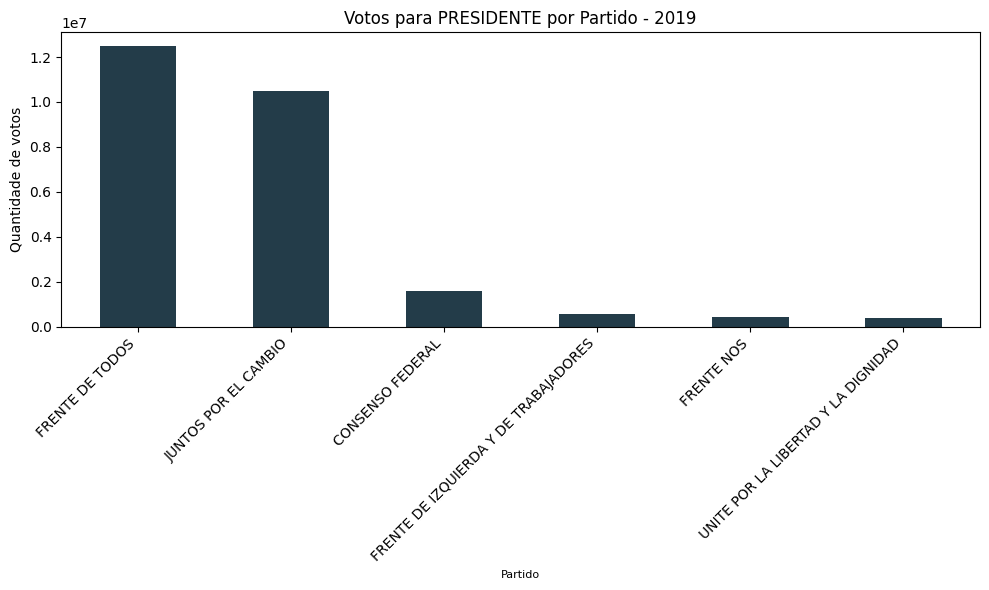

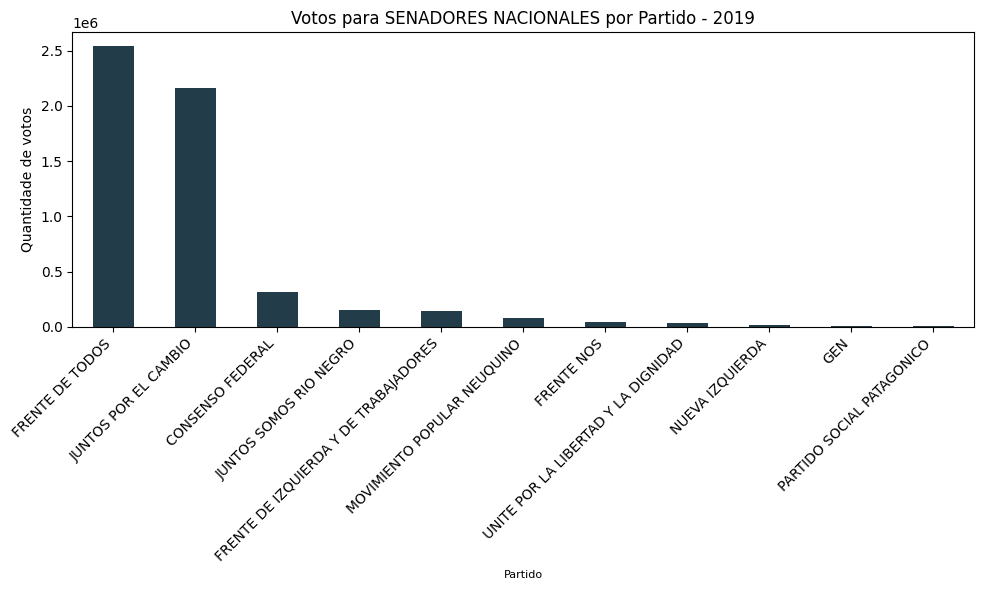

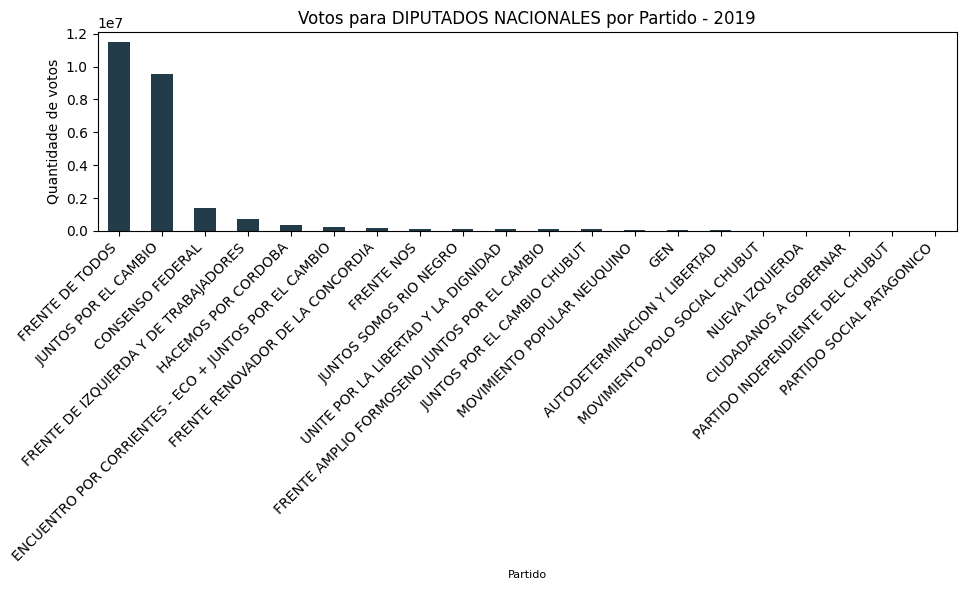

In [456]:
plot_votos(df_2019,"PRESIDENTE", 2019)
plot_votos(df_2019,"SENADORES NACIONALES", 2019)
plot_votos(df_2019,"DIPUTADOS NACIONALES", 2019)

In [457]:
#Leitura do CSV de 2017 contendo os resultados eleitorais provisorios
df_2017 = read_csv("data\ResultadosElectorales2017.csv")
df_2017['agrupacion_nombre'] = df_2017['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2017)

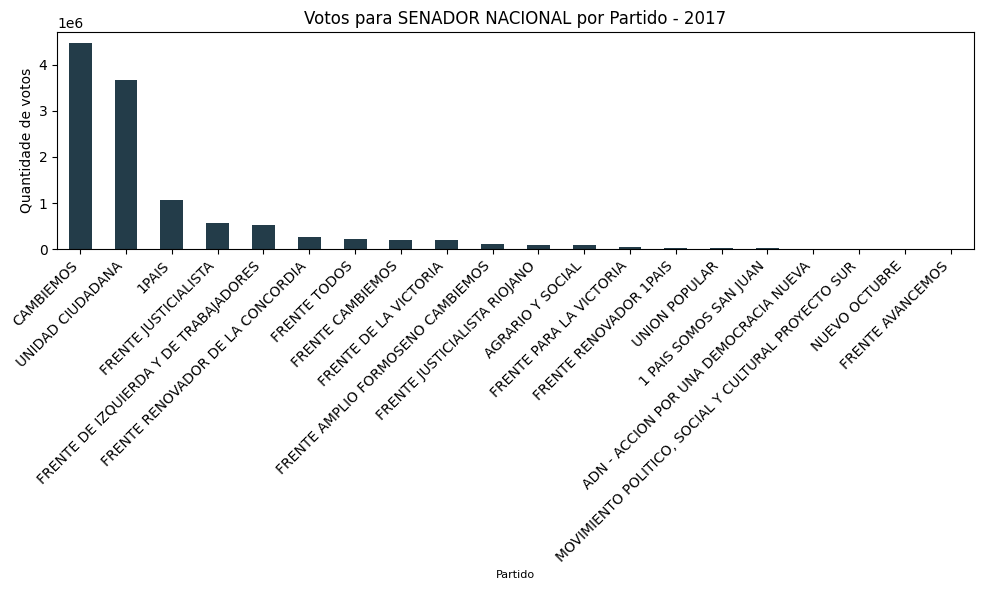

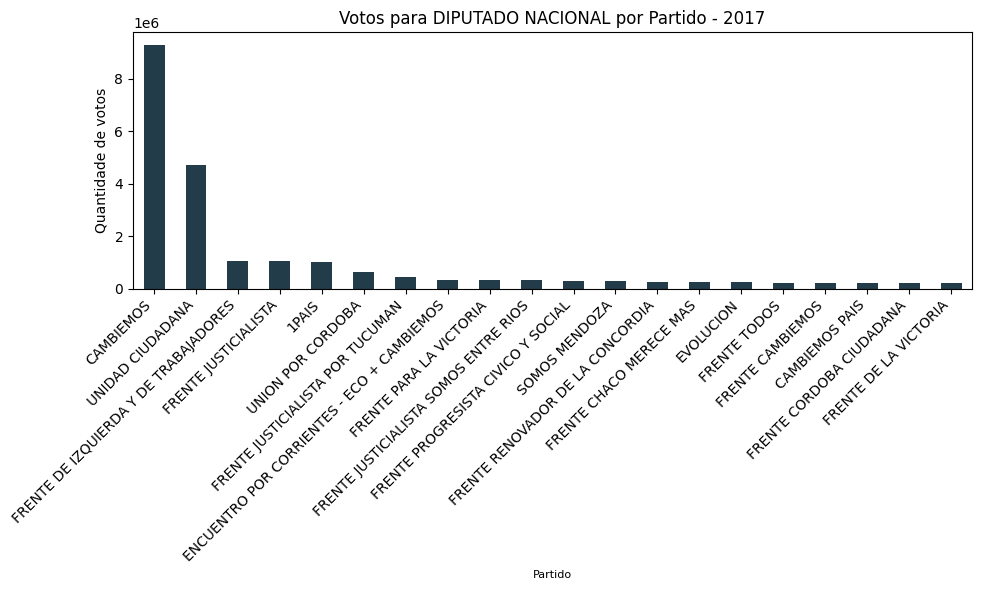

In [458]:
plot_votos(df_2017,"SENADOR NACIONAL", 2017)
plot_votos(df_2017,"DIPUTADO NACIONAL", 2017)

In [459]:
#Leitura do CSV de 2015 contendo os resultados eleitorais provisorios
df_2015 = read_csv("data\ResultadosElectorales2015.csv")
df_2015['agrupacion_nombre'] = df_2015['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2015)

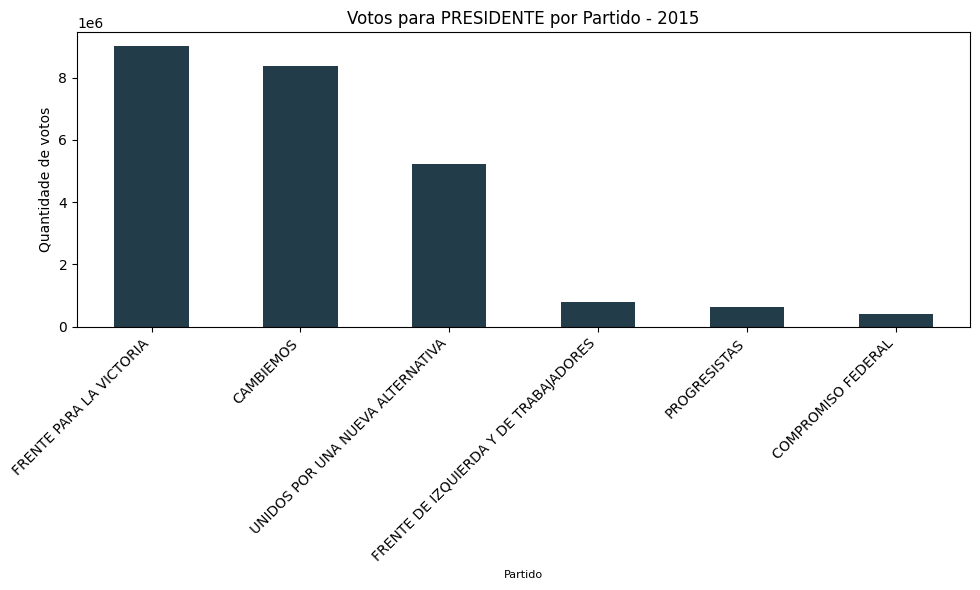

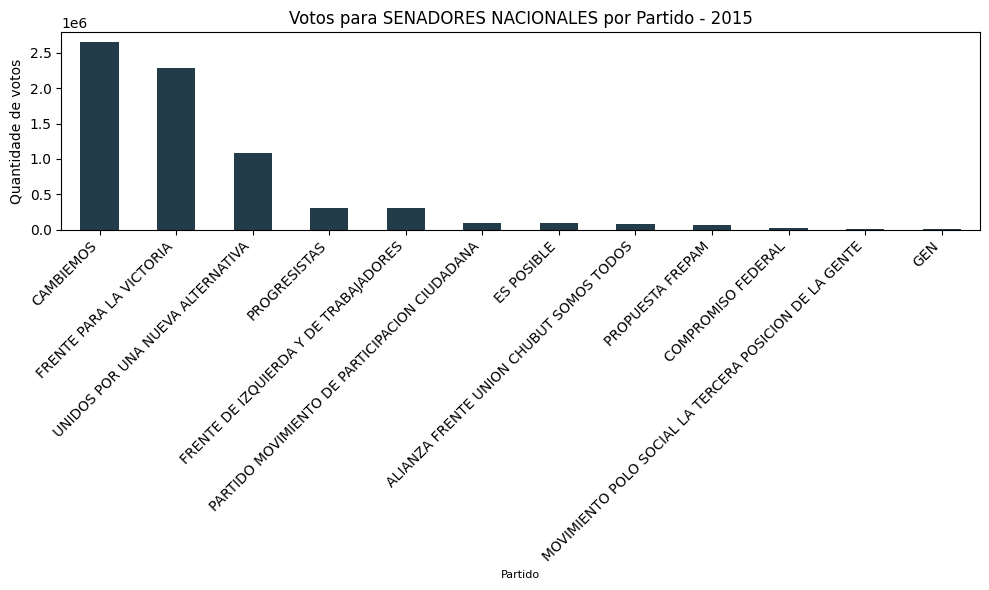

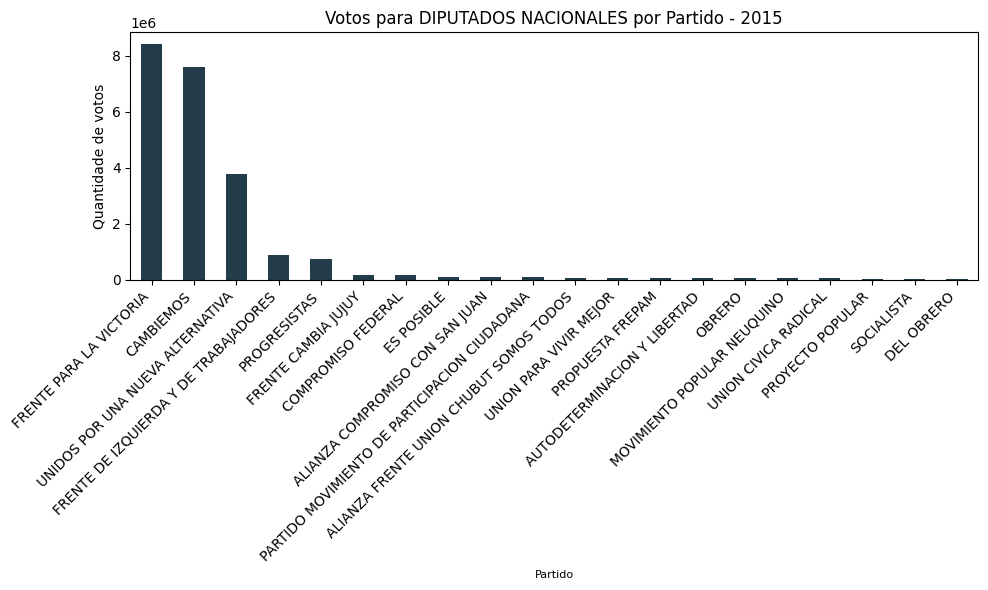

In [460]:
plot_votos(df_2015,"PRESIDENTE", 2015)
plot_votos(df_2015,"SENADORES NACIONALES", 2015)
plot_votos(df_2015,"DIPUTADOS NACIONALES", 2015)

In [461]:
#Leitura do CSV de 2013 contendo os resultados eleitorais provisorios
df_2013 = read_csv("data\ResultadosElectorales2013.csv")
df_2013['agrupacion_nombre'] = df_2013['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2013)

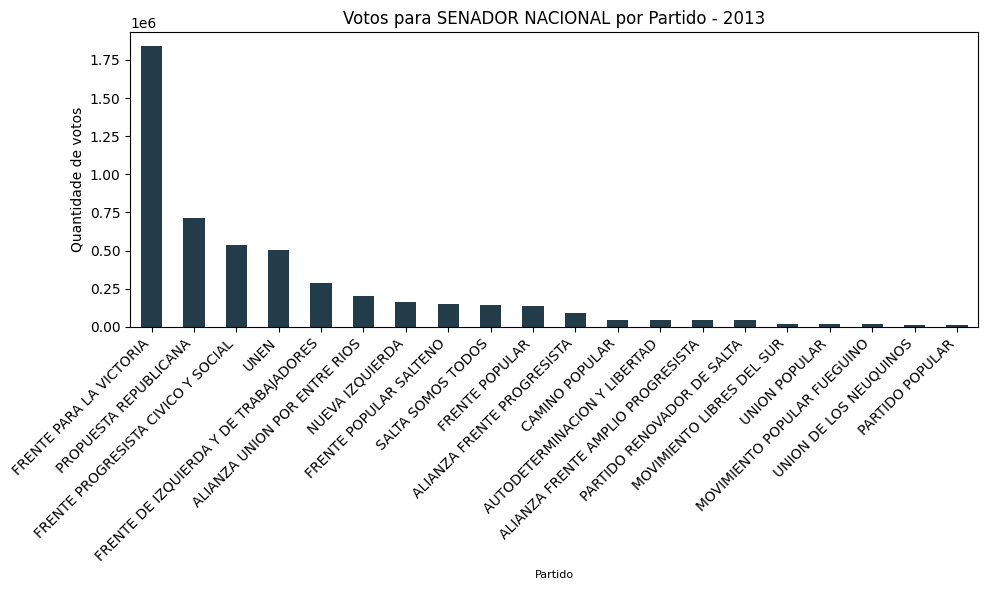

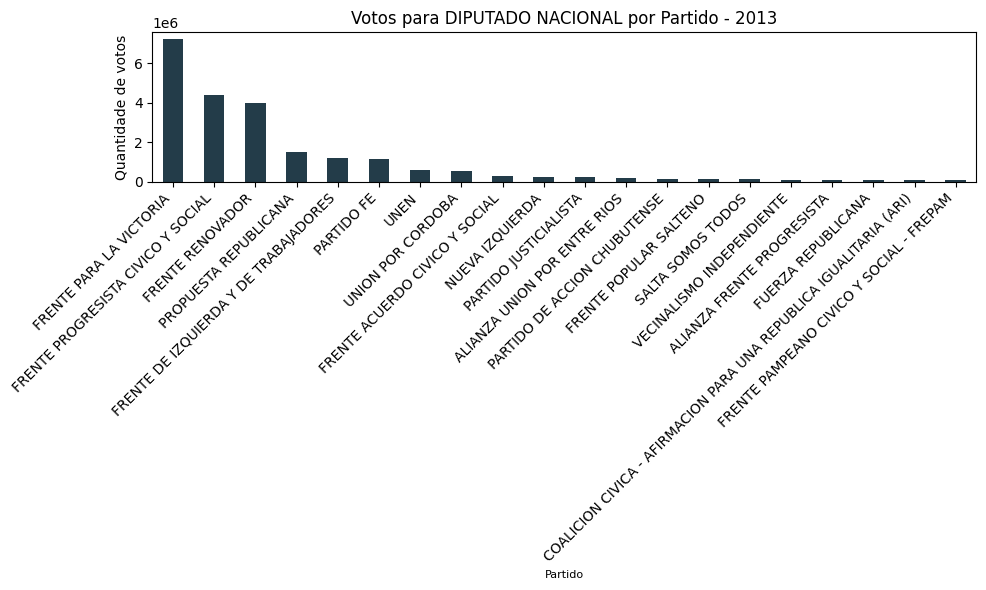

In [462]:
plot_votos(df_2013,"SENADOR NACIONAL", 2013)
plot_votos(df_2013,"DIPUTADO NACIONAL", 2013)

In [463]:
#Leitura do CSV de 2011 contendo os resultados eleitorais provisorios
df_2011 = read_csv("data\ResultadosElectorales2011.csv")
df_2011['agrupacion_nombre'] = df_2011['agrupacion_nombre'].apply(normalize_name,normalizacoes=normalizacoes_2011)

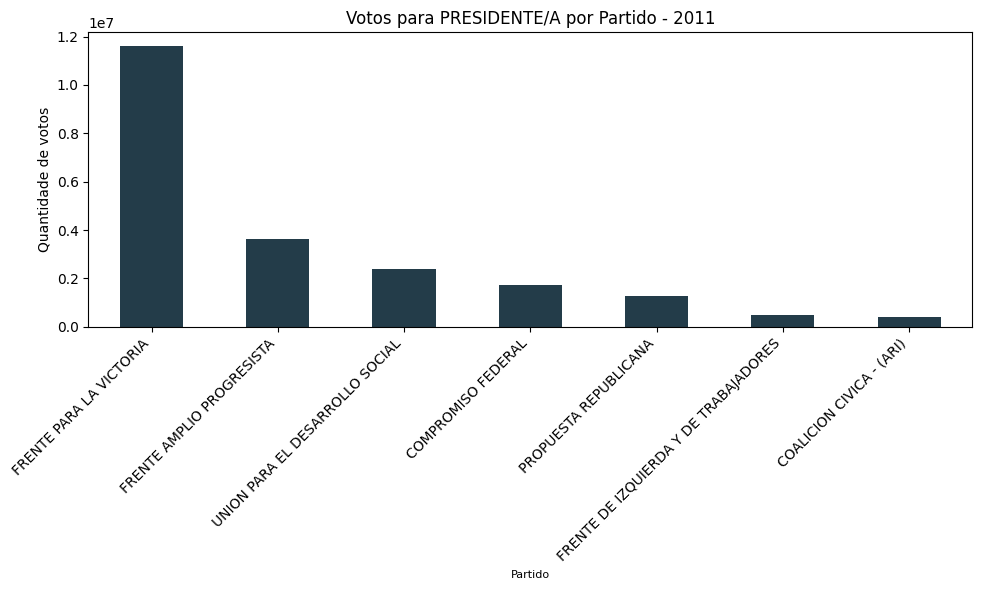

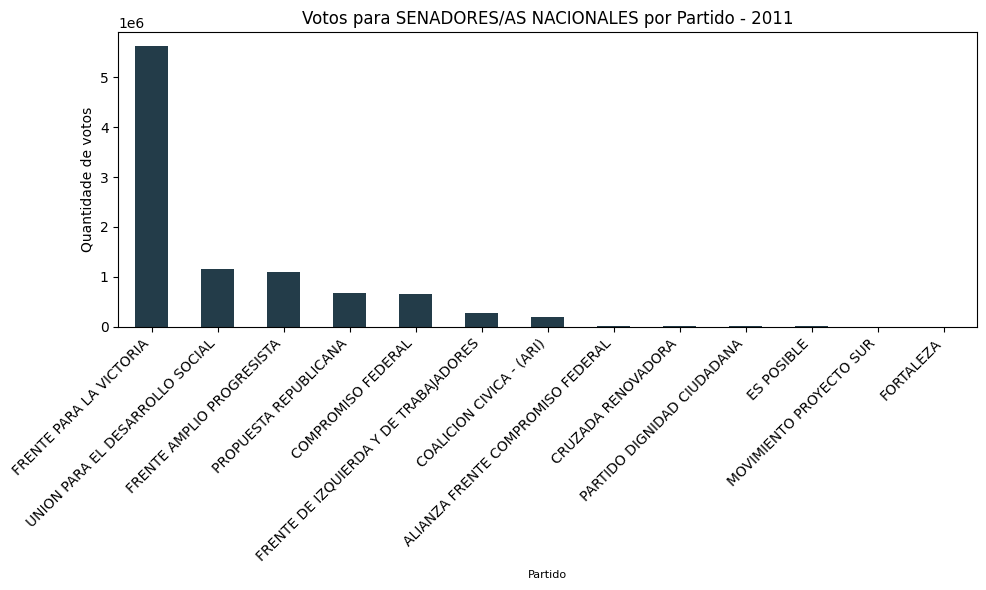

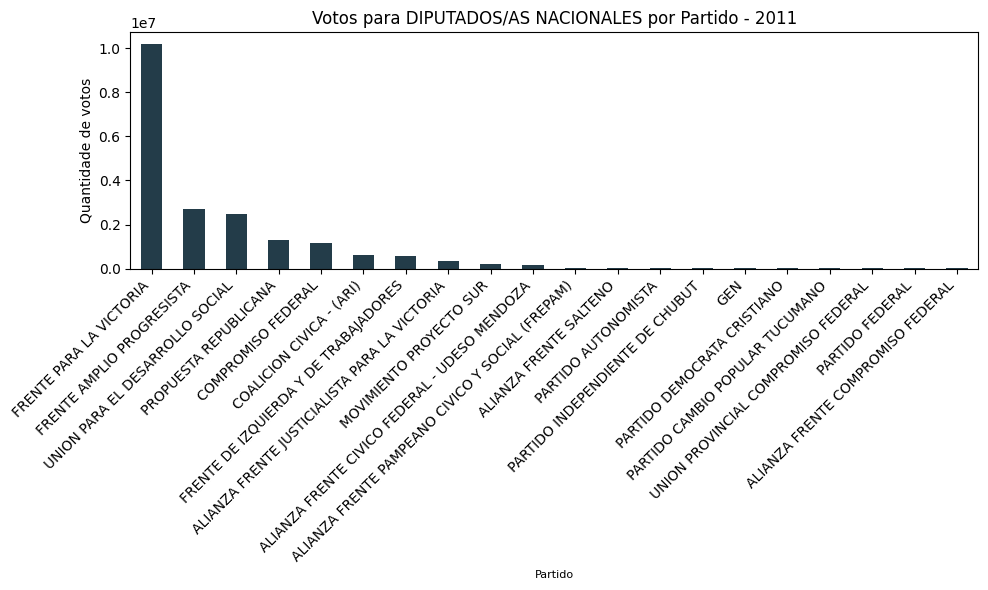

In [464]:
plot_votos(df_2011,"PRESIDENTE/A", 2011)
plot_votos(df_2011,"SENADORES/AS NACIONALES", 2011)
plot_votos(df_2011,"DIPUTADOS/AS NACIONALES", 2011)

Para os anos anteriores a 2011, base de dados provisorias em .csv nao estavam mais disponiveis, portanto, iriamos utilizar as planilhas das contagens definitivas discretizadas por provincia, como o trabalho manualmente nao seria viavel, encontramos em paginas na wikipedia os totais de votos das coalizoes, os quais, após algumas comparacoes com as planilhas definitivas, parecem estar corretos. Para consistencia, vamos manter a métrica de deputados nacionais, mapeando apenas para coalizoes.

In [465]:
#Leitura do CSV de 2009 contendo os resultados eleitorais provisorios
df_2009 = read_csv("data\WikipediaResultadosElectorales_2009.csv")
df_2009['agrupacion_nombre'] = df_2009['agrupacion_nombre'].apply(normalize_name)

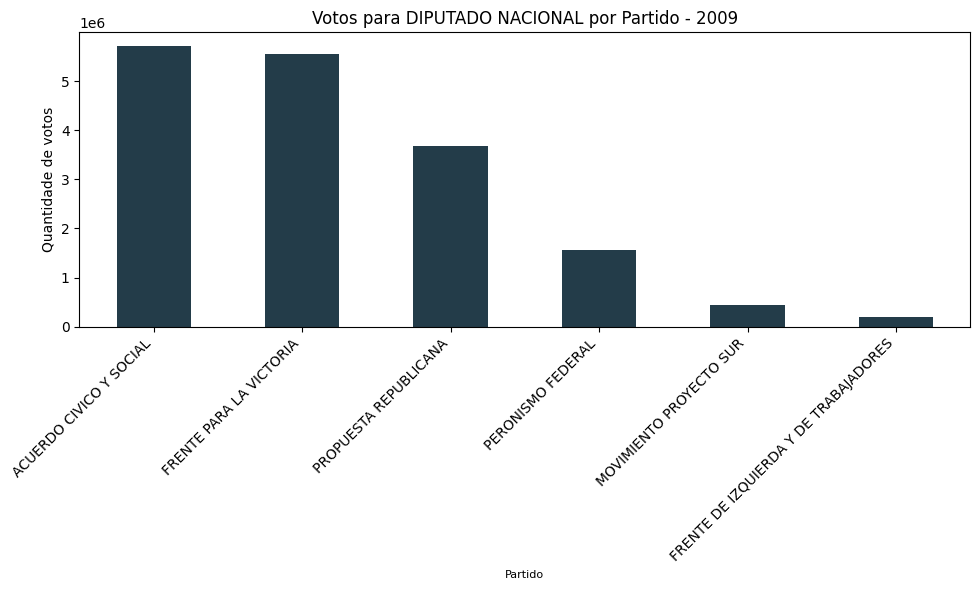

In [466]:
plot_votos(df_2009,"DIPUTADO NACIONAL", 2009)

In [467]:
#Leitura do CSV de 2007 contendo os resultados eleitorais provisorios
df_2007 = read_csv("data\WikipediaResultadosElectorales_2007.csv")
df_2007['agrupacion_nombre'] = df_2007['agrupacion_nombre'].apply(normalize_name)

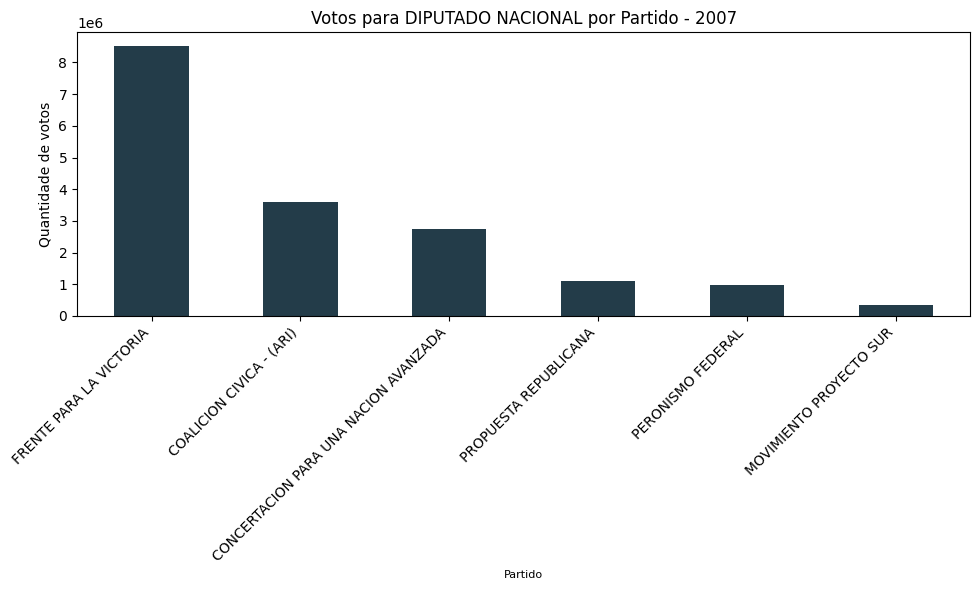

In [468]:
plot_votos(df_2007,"DIPUTADO NACIONAL", 2007)

In [469]:
#Leitura do CSV de 2005 contendo os resultados eleitorais provisorios
df_2005 = read_csv("data\WikipediaResultadosElectorales_2005.csv")
df_2005['agrupacion_nombre'] = df_2005['agrupacion_nombre'].apply(normalize_name)

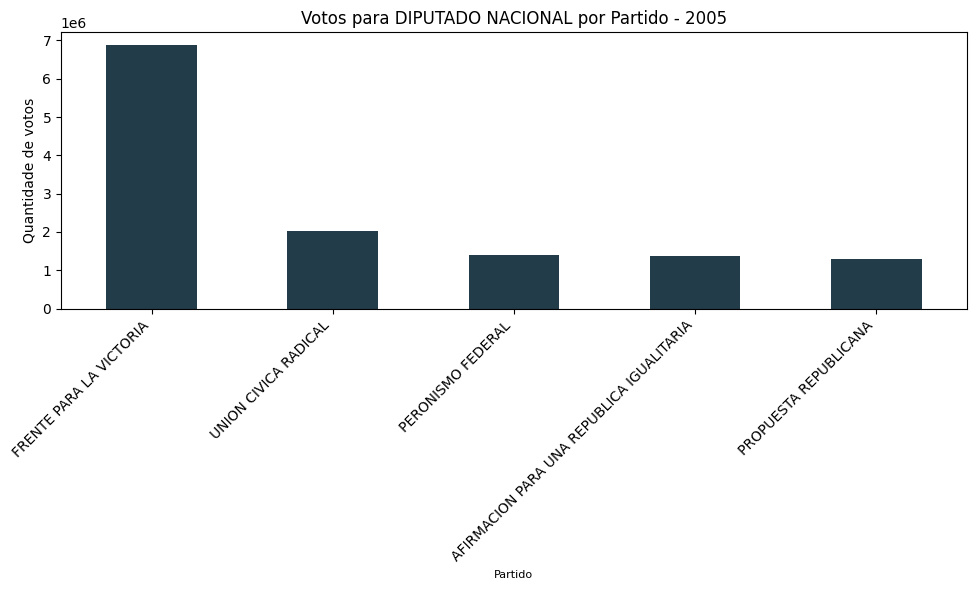

In [470]:
plot_votos(df_2005,"DIPUTADO NACIONAL", 2005)

In [471]:
#Leitura do CSV de 2003 contendo os resultados eleitorais provisorios
df_2003 = read_csv("data\WikipediaResultadosElectorales_2003.csv")
df_2003['agrupacion_nombre'] = df_2003['agrupacion_nombre'].apply(normalize_name)

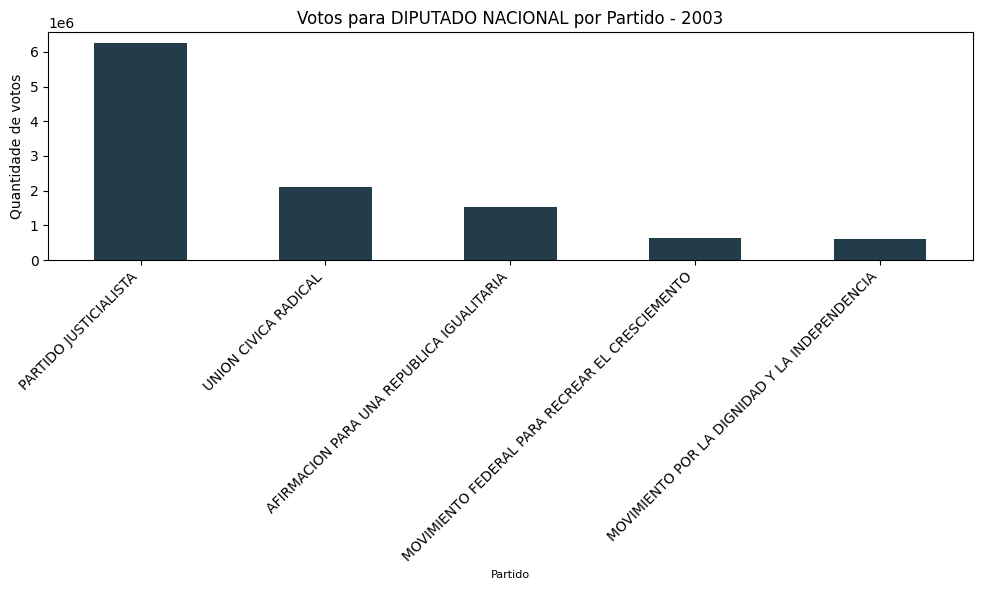

In [472]:
plot_votos(df_2003,"DIPUTADO NACIONAL", 2003)

In [473]:
def calcular_ipp_eleicao(df_votos: pd.DataFrame, df_ipp: pd.DataFrame, filtro_cargo: str ,coluna_partido="agrupacion_nombre"):
    # Filtra apenas a eleicao e o cargo desejado
    df_cargo = df_votos[df_votos["cargo_nombre"] == filtro_cargo].copy()

    # Merge para associar o IPP de cada partido
    df_merge = df_cargo.merge(df_ipp, left_on=coluna_partido, right_on="Partidos/Coalizacoes Nacionais", how='inner')

    # Renomeia a col IPP
    df_merge.rename(columns={"IPP (Índice de Posição Política)": "IPP"}, inplace=True)

    # Converte para numérico 
    df_merge["IPP"] = pd.to_numeric(df_merge["IPP"], errors="coerce")
    df_merge["votos_cantidad"] = pd.to_numeric(df_merge["votos_cantidad"], errors="coerce")
    
    # Calcula peso IPP * votos
    df_merge["IPP_ponderado"] = df_merge["IPP"] * df_merge["votos_cantidad"]

   # Total de votos válidos com IPP
    total_votos = df_merge["votos_cantidad"].sum()

    # Média ponderada
    ipp_total = df_merge["IPP_ponderado"].sum() / total_votos if total_votos > 0 else None

    return ipp_total, df_merge

In [474]:
df_ipp = read_csv("data\PartidosNacionaisArgentinaIPP.csv")
df_ipp['Partidos/Coalizacoes Nacionais'] = df_ipp['Partidos/Coalizacoes Nacionais']

In [475]:
anos_dfs_deputados_ate_2011 = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
    2011: (df_2011, "DIPUTADOS/AS NACIONALES")
}

anos_dfs_deputados = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
    2011: (df_2011, "DIPUTADOS/AS NACIONALES"),
    2009: (df_2009, "DIPUTADO NACIONAL"),
    2007: (df_2007, "DIPUTADO NACIONAL"),
    2005: (df_2005, "DIPUTADO NACIONAL"),
    2003: (df_2003, "DIPUTADO NACIONAL")
}

anos_dfs_senadores= {
    2023: (df_2023, "SENADOR NACIONAL"),
    2021: (df_2021, "SENADORES NACIONALES"),
    2019: (df_2019, "SENADORES NACIONALES"),
    2017: (df_2017, "SENADOR NACIONAL"),
    2015: (df_2015, "SENADORES NACIONALES"),
    2013: (df_2013, "SENADOR NACIONAL"),
    2011: (df_2011, "SENADORES/AS NACIONALES")

}

In [476]:
def exibir_ipp(dict_dep: dict, dict_sen:dict, df_ipp):
    resultados = {}
    ipps_deputados = {}
    ipps_senadores = {}

    # loop sobre o dicionario de senadores
    for ano, (df, cargo) in dict_sen.items():
        ipp_total_senadores, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        resultados[ano] = (ipp_total_senadores, df_merge)
        ipps_senadores[ano] = ipp_total_senadores
        print(f"IPP total da eleição para Senadores Nacionais {ano}: {ipp_total_senadores}")

    # loop sobre o dicionario de deputados
    for ano, (df, cargo) in dict_dep.items():
        ipp_total_deputados, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        resultados[ano] = (ipp_total_deputados, df_merge)
        ipps_deputados[ano] = ipp_total_deputados
        print(f"IPP total da eleição para Deputados Nacionais {ano}: {ipp_total_deputados}")

 
    
    return ipps_deputados, ipps_senadores, resultados
        

In [477]:
anos_dep_ate_2011 = [2011,2013,2015,2017,2019,2021,2023]
anos_dep = [2003,2005,2007,2009,2011,2013,2015,2017,2019,2021,2023]
anos_sen = [2011,2013,2015,2017,2019,2021,2023]

def exibir_grafico_ipp(valores: list, ipps: dict, cargo: str, anos:list):
    plt.figure(figsize=(8, 5))
    plt.bar(anos, valores, color="#233C49")

    plt.xlabel("Ano da Eleição")
    plt.ylabel("IPP Total")
    plt.title(f"IPP Total por Eleição ({anos[0]}-{anos[-1]}) ({cargo})")
    plt.axhline(0, color="black", linewidth=0.8)

    plt.xticks(anos)

    # Mostrar valores acima das barras
    for i, v in enumerate(valores):
        if anos[i] in ipps:
            plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.03, f"{v:.2f}", 
                    ha="center", fontsize=9)

    plt.show()

In [478]:
ipps_deputados, ipps_senadores, _ = exibir_ipp(anos_dfs_deputados_ate_2011, anos_dfs_senadores, df_ipp=df_ipp)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.14141525726974044
IPP total da eleição para Senadores Nacionais 2019: -0.12534043722228497
IPP total da eleição para Senadores Nacionais 2017: -0.39961505557562926
IPP total da eleição para Senadores Nacionais 2015: 0.13839692206824392
IPP total da eleição para Senadores Nacionais 2013: -0.721744085932418
IPP total da eleição para Senadores Nacionais 2011: -0.33952841449844134
IPP total da eleição para Deputados Nacionais 2023: 0.36428512212876535
IPP total da eleição para Deputados Nacionais 2021: 0.04975566298576286
IPP total da eleição para Deputados Nacionais 2019: -0.13970009079870038
IPP total da eleição para Deputados Nacionais 2017: -0.22734322233070986
IPP total da eleição para Deputados Nacionais 2015: 0.0661040671069334
IPP total da eleição para Deputados Nacionais 2013: -0.8075092140520467
IPP total da eleição para Deputados Nacionais 2011: -0.320596

In [479]:
valores_deputados = list(ipps_deputados.get(ano, 0) for ano in anos_dep_ate_2011)
valores_senadores = list(ipps_senadores.get(ano, 0) for ano in anos_sen)

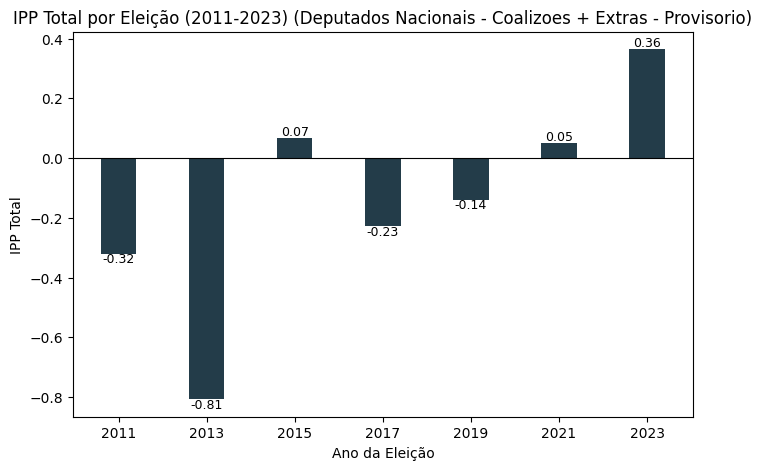

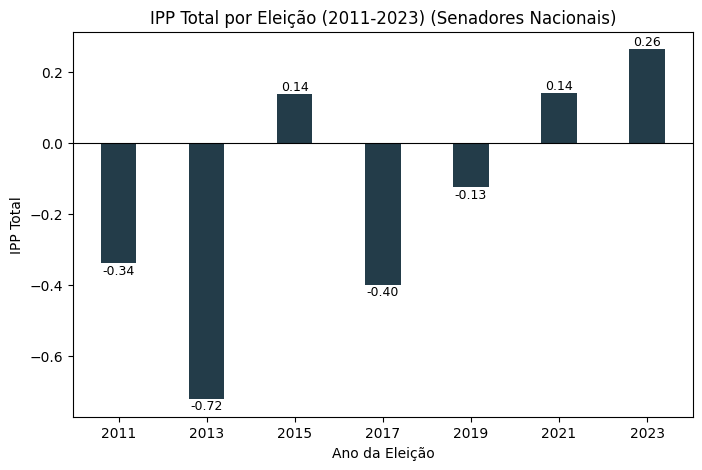

In [480]:
exibir_grafico_ipp(valores_deputados, ipps_deputados, "Deputados Nacionais - Coalizoes + Extras - Provisorio", anos_dep_ate_2011)
exibir_grafico_ipp(valores_senadores, ipps_senadores,"Senadores Nacionais",anos_sen )

Agora vamos analisar apenas para as coalizões, excluindo os partidos nacionais que foram mapeados.

In [481]:
df_ipp_coalizoes = read_csv("data\CoalizoesArgentinaIPP.csv")
df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'] = df_ipp_coalizoes['Partidos/Coalizacoes Nacionais']

In [482]:
ipps_deputados_coalizoes, ipps_senadores_coalizoes, resultados = exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.06817376738936451
IPP total da eleição para Senadores Nacionais 2019: -0.12553072450029834
IPP total da eleição para Senadores Nacionais 2017: -0.18627811314417933
IPP total da eleição para Senadores Nacionais 2015: 0.08587510185997477
IPP total da eleição para Senadores Nacionais 2013: -0.7202269218364706
IPP total da eleição para Senadores Nacionais 2011: -0.493894951997982
IPP total da eleição para Deputados Nacionais 2023: 0.358797923707037
IPP total da eleição para Deputados Nacionais 2021: 0.029818876028965262
IPP total da eleição para Deputados Nacionais 2019: -0.13984610286197208
IPP total da eleição para Deputados Nacionais 2017: -0.019219369620518314
IPP total da eleição para Deputados Nacionais 2015: 0.028872678220787568
IPP total da eleição para Deputados Nacionais 2013: -0.8052475059589159
IPP total da eleição para Deputados Nacionais 2011: -0.48555

In [483]:
valores_deputados_coalizoes = list(ipps_deputados_coalizoes.get(ano, 0) for ano in anos_dep)
valores_senadores_coalizoes = list(ipps_senadores_coalizoes.get(ano, 0) for ano in anos_sen)

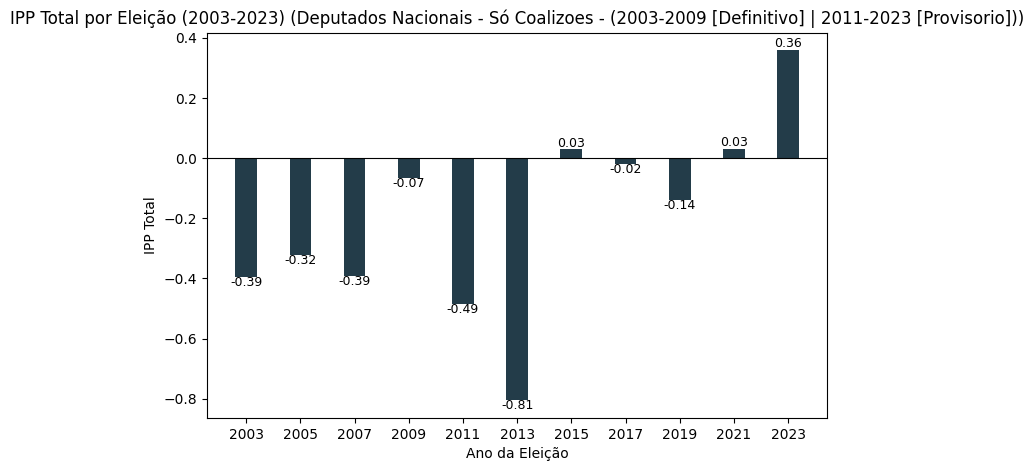

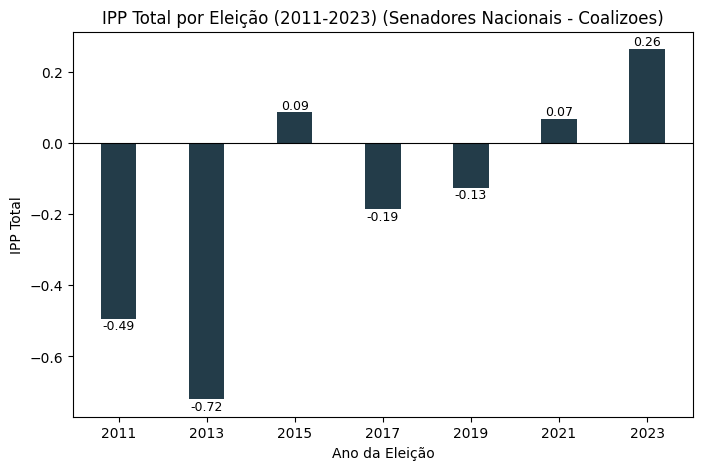

In [484]:
exibir_grafico_ipp(valores_deputados_coalizoes, ipps_deputados_coalizoes, "Deputados Nacionais - Só Coalizoes - (2003-2009 [Definitivo] | 2011-2023 [Provisorio])", anos_dep)
exibir_grafico_ipp(valores_senadores_coalizoes, ipps_senadores_coalizoes,"Senadores Nacionais - Coalizoes", anos_sen )

A partir de agora, vamos finalmente chegar ao nosso grafico de IPP definitivo, no qual vamos usar todos os dados provenientes da wikipedia para todos os anos, somente com coalizoes, que parece traduzir exatamente a contagem definitiva.

In [485]:
df_2023_definitivo = read_csv("data\WikipediaResultadosElectorales_2023.csv")
df_2023_definitivo['agrupacion_nombre'] = df_2023_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2021_definitivo = read_csv("data\WikipediaResultadosElectorales_2021.csv")
df_2021_definitivo['agrupacion_nombre'] = df_2021_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2019_definitivo = read_csv("data\WikipediaResultadosElectorales_2019.csv")
df_2019_definitivo['agrupacion_nombre'] = df_2019_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2017_definitivo = read_csv("data\WikipediaResultadosElectorales_2017.csv")
df_2017_definitivo['agrupacion_nombre'] = df_2017_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2015_definitivo = read_csv("data\WikipediaResultadosElectorales_2015.csv")
df_2015_definitivo['agrupacion_nombre'] = df_2015_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2013_definitivo = read_csv("data\WikipediaResultadosElectorales_2013.csv")
df_2013_definitivo['agrupacion_nombre'] = df_2013_definitivo['agrupacion_nombre'].apply(normalize_name)

df_2011_definitivo = read_csv("data\WikipediaResultadosElectorales_2011.csv")
df_2011_definitivo['agrupacion_nombre'] = df_2011_definitivo['agrupacion_nombre'].apply(normalize_name)

IPP total da eleição para Senadores Nacionais 2023: 0.26366122612414844
IPP total da eleição para Senadores Nacionais 2021: 0.06817376738936451
IPP total da eleição para Senadores Nacionais 2019: -0.12553072450029834
IPP total da eleição para Senadores Nacionais 2017: -0.18627811314417933
IPP total da eleição para Senadores Nacionais 2015: 0.08587510185997477
IPP total da eleição para Senadores Nacionais 2013: -0.7202269218364706
IPP total da eleição para Senadores Nacionais 2011: -0.493894951997982
IPP total da eleição para Deputados Nacionais 2023: 0.4595533723029791
IPP total da eleição para Deputados Nacionais 2021: 0.08809902861009594
IPP total da eleição para Deputados Nacionais 2019: -0.1186462800879284
IPP total da eleição para Deputados Nacionais 2017: -0.16592435640069614
IPP total da eleição para Deputados Nacionais 2015: 0.041566262785995116
IPP total da eleição para Deputados Nacionais 2013: -0.8579168656123279
IPP total da eleição para Deputados Nacionais 2011: -0.4621974

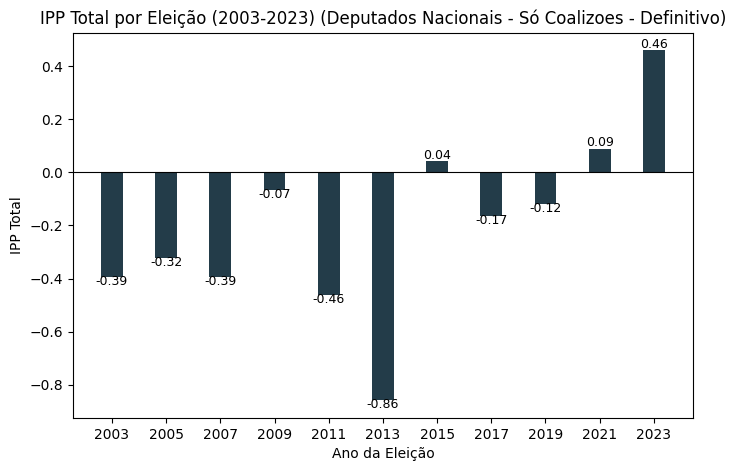

{2023: (np.float64(0.4595533723029791),           agrupacion_nombre       cargo_nombre  votos_cantidad  \
0       UNION POR LA PATRIA  DIPUTADO NACIONAL         9298491   
1        LA LIBERTAD AVANZA  DIPUTADO NACIONAL         6843049   
2      JUNTOS POR EL CAMBIO  DIPUTADO NACIONAL         6412133   
3  HACEMOS POR NUESTRO PAIS  DIPUTADO NACIONAL          946840   

  Partidos/Coalizacoes Nacionais Espectro Politico  IPP  IPP_ponderado  
0            UNION POR LA PATRIA                     -1       -9298491  
1             LA LIBERTAD AVANZA               NaN    2       13686098  
2           JUNTOS POR EL CAMBIO               NaN    1        6412133  
3       HACEMOS POR NUESTRO PAIS               NaN    0              0  ), 2021: (np.float64(0.08809902861009594),                        agrupacion_nombre       cargo_nombre  votos_cantidad  \
0                        FRENTE DE TODOS  DIPUTADO NACIONAL         8041290   
1                     LA LIBERTAD AVANZA  DIPUTADO NACIONAL     

In [486]:
anos_dfs_deputados_definitivo = {
    2023: (df_2023_definitivo, "DIPUTADO NACIONAL"),
    2021: (df_2021_definitivo, "DIPUTADO NACIONAL"),
    2019: (df_2019_definitivo, "DIPUTADO NACIONAL"),
    2017: (df_2017_definitivo, "DIPUTADO NACIONAL"),
    2015: (df_2015_definitivo, "DIPUTADO NACIONAL"),
    2013: (df_2013_definitivo, "DIPUTADO NACIONAL"),
    2011: (df_2011_definitivo, "DIPUTADO NACIONAL"),
    2009: (df_2009, "DIPUTADO NACIONAL"),
    2007: (df_2007, "DIPUTADO NACIONAL"),
    2005: (df_2005, "DIPUTADO NACIONAL"),
    2003: (df_2003, "DIPUTADO NACIONAL")
}

ipps_deputados_definitivo, _, resultados = exibir_ipp(anos_dfs_deputados_definitivo, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)
valores_deputados_definitivo  = list(ipps_deputados_definitivo.get(ano, 0) for ano in anos_dep)
exibir_grafico_ipp(valores_deputados_definitivo, ipps_deputados_definitivo, "Deputados Nacionais - Só Coalizoes - Definitivo", anos_dep)
print(resultados)

Ate agora, todos nossos esforços se concentraram em obter a melhor metrica do IPP e os melhores dados possiveis. Concluimos portanto que o IPP para Deputados Nacionais é melhor do que o IPP para Senadores Nacionais, já que de 2 em 2 anos, apenas 8 provincias votam para senadores, renovando 1/3 das cadeiras, enquanto para deputados, todas as provincias votam de 2 em 2 anos, dessa forma, ao escolher deputados nacionais, removemos algum viés possível em algum ano de eleição no qual várias províncias de mesma ideologia votam. Além disso, notamos que utilizar apenas coalizões ou utilizar coalizões e alguns partidos fora delas é pouco diferente para o cálculo do IPP, a esmagadora maioria do IPP é proveniente dos votos nas coalizões, sendo assim, adicionar ou não partidos fora de coalizões é irrisório. Outra conclusão que chegamos é que ter acesso ou não às contagens definitivas também não influencia muito na tendência e na amplitude do IPP, sendo assim, caso possua apenas votos provisórios, pelo menos para deputados nacionais, o IPP parece funcionar bem. Dessa forma, concluímos que a melhor métrica foi Deputados Nacionais, somente com coalizões, retirando os dados das contagens definitivas da Wikipedia, para manter a consistência entre 2003 e 2023 da proveniência dos dados.